In [1]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_pickle("train/train.pickle")

In [3]:
df = pd.DataFrame(data)
df.head(3)

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [28]:
del data

In [5]:
import matplotlib.pyplot as plt

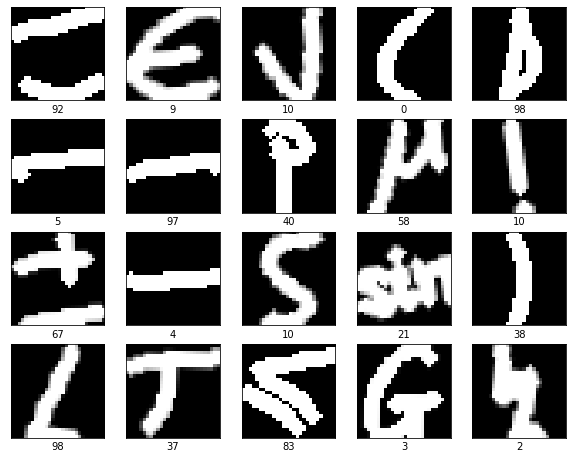

In [6]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i+50]['features'].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(list(data[i+50]['label']).index(1)) # number of class

In [7]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [9]:
x_train = features_to_matrix(df[:70000])

In [10]:
x_train = pd.concat([x_train, features_to_matrix(df[70000:])], axis=0)

In [12]:
x_train.shape

(139976, 784)

In [13]:
y_train = df['label']

In [14]:
del df

In [15]:
from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten

Using TensorFlow backend.


In [16]:
hidden_size = 64

In [21]:
classes_num = y_train.shape

In [22]:
classes_num

(139976,)

In [23]:
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))

In [24]:
classes_num = y_train.shape

(139976, 101)

In [17]:
model = Sequential()

In [18]:
model.add(Dense(hidden_size, activation='relu', input_shape=(784,)))

In [19]:
model.add(Dense(hidden_size, activation='relu'))

In [25]:
model.add(Dense(classes_num[1], activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
139976/139976 [==============================] - 20s 144us/step - loss: 1.7620 - accuracy: 0.5521
Epoch 2/20
139976/139976 [==============================] - 20s 142us/step - loss: 1.0280 - accuracy: 0.7091
Epoch 3/20
139976/139976 [==============================] - 20s 146us/step - loss: 0.8904 - accuracy: 0.7420
Epoch 4/20
139976/139976 [==============================] - 19s 137us/step - loss: 0.8079 - accuracy: 0.7620
Epoch 5/20
139976/139976 [==============================] - 19s 138us/step - loss: 0.7505 - accuracy: 0.7760
Epoch 6/20
139976/139976 [==============================] - 20s 146us/step - loss: 0.7061 - accuracy: 0.7882
Epoch 7/20
139976/139976 [==============================] - 21s 147us/step - loss: 0.6710 - accuracy: 0.7963
Epoch 8/20
139976/139976 [==============================] - 22s 154us/step - loss: 0.6431 - accuracy: 0.8040
Epoch 9/20
139976/139976 [==============================] - 22s 159us/step - loss: 0.6221 - accuracy: 0.8098
Epoch 10/20
139976/

In [29]:
test_data = pd.read_pickle("test/test.pickle")

In [30]:
df = pd.DataFrame(test_data)
df.head(3)

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [31]:
df.shape

(5555, 2)

In [32]:
x_test = features_to_matrix(df)

In [33]:
y_test = df['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [34]:
x_test.shape

(5555, 784)

In [35]:
y_test.shape

(5555, 101)

In [37]:
model.predict(x_test)

array([[8.97333549e-31, 5.85159652e-22, 3.40457079e-15, ...,
        1.48333935e-02, 6.27015252e-05, 3.45541143e-25],
       [1.81582326e-19, 1.83647452e-03, 1.80688294e-05, ...,
        7.33324157e-08, 2.30946753e-05, 6.00099437e-09],
       [5.74308173e-24, 1.61680185e-13, 2.80381903e-15, ...,
        8.92207086e-10, 1.44941316e-06, 6.42535106e-16],
       ...,
       [0.00000000e+00, 4.96455506e-23, 5.69711648e-26, ...,
        3.06472692e-09, 1.46833994e-08, 2.40332851e-33],
       [3.16947144e-20, 8.37761378e-16, 9.16905436e-16, ...,
        4.86975471e-14, 1.40943456e-07, 6.43765844e-18],
       [1.01412576e-08, 3.76652247e-06, 1.88554108e-01, ...,
        5.45987953e-03, 2.65259405e-05, 3.92029498e-04]], dtype=float32)

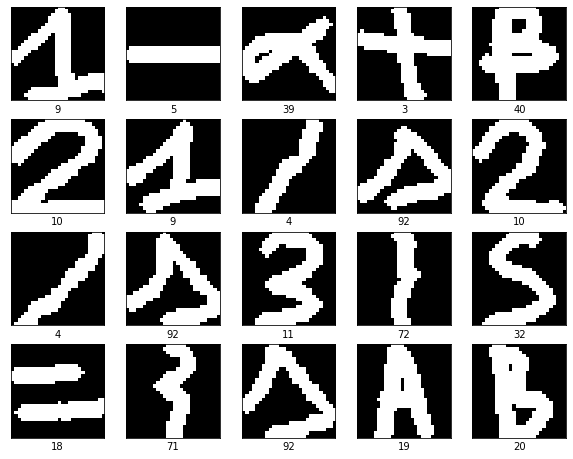

In [61]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[i+20]['features'].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(list(test_data[i+20]['label']).index(1)) # number of class

In [47]:
np.argmax(model.predict(x_test)[50])

10

In [49]:
score, acc = model.evaluate(x_test, y_test, batch_size=128)

5555/5555 [==============================] - 0s 63us/step


In [50]:
score, acc

(0.8488895774209532, 0.77641761302948)

In [53]:
prediction = model.predict(x_test)

In [54]:
result = []
for i in range(x_test.shape[0]):
    result.append(np.argmax(prediction[i]))
result

[87,
 82,
 18,
 41,
 74,
 41,
 75,
 3,
 54,
 74,
 54,
 84,
 85,
 9,
 5,
 28,
 5,
 87,
 18,
 27,
 9,
 5,
 39,
 3,
 40,
 10,
 9,
 7,
 38,
 10,
 4,
 38,
 11,
 72,
 92,
 18,
 79,
 17,
 19,
 20,
 10,
 9,
 84,
 78,
 10,
 9,
 5,
 10,
 20,
 21,
 10,
 3,
 10,
 19,
 10,
 18,
 9,
 20,
 94,
 1,
 74,
 2,
 84,
 94,
 49,
 9,
 14,
 29,
 84,
 5,
 84,
 84,
 3,
 74,
 18,
 67,
 80,
 55,
 2,
 24,
 1,
 98,
 2,
 5,
 24,
 1,
 18,
 98,
 74,
 48,
 23,
 68,
 97,
 18,
 65,
 97,
 5,
 41,
 35,
 9,
 3,
 68,
 10,
 70,
 9,
 9,
 86,
 3,
 34,
 85,
 5,
 27,
 26,
 18,
 26,
 82,
 10,
 66,
 17,
 97,
 91,
 38,
 25,
 9,
 86,
 70,
 26,
 31,
 11,
 35,
 11,
 33,
 1,
 84,
 7,
 76,
 2,
 30,
 97,
 88,
 11,
 97,
 3,
 94,
 1,
 75,
 2,
 17,
 97,
 90,
 76,
 87,
 3,
 9,
 1,
 2,
 9,
 1,
 81,
 1,
 2,
 2,
 22,
 18,
 22,
 1,
 1,
 98,
 10,
 89,
 97,
 97,
 5,
 89,
 9,
 5,
 97,
 8,
 5,
 10,
 18,
 73,
 37,
 97,
 97,
 73,
 18,
 97,
 30,
 37,
 73,
 97,
 37,
 28,
 1,
 8,
 2,
 93,
 16,
 87,
 97,
 3,
 5,
 1,
 20,
 98,
 40,
 2,
 87,
 51,
 74,
 51,
 3

In [66]:
true_y = []
for i in range(x_test.shape[0]):
    true_y.append(list(test_data[i]['label']).index(1))
true_y[20:40]

[9, 5, 39, 3, 40, 10, 9, 4, 92, 10, 4, 92, 11, 72, 32, 18, 71, 92, 19, 20]

In [71]:
symbol_dict = {}
with open('../classes.txt', 'r') as f:
    i = 0
    for line in f:
        symbol_dict[i] = line.strip()
        i += 1

In [72]:
symbol_dict

{0: '!',
 1: '(',
 2: ')',
 3: '+',
 4: ',',
 5: '-',
 6: '.',
 7: '/',
 8: '0',
 9: '1',
 10: '2',
 11: '3',
 12: '4',
 13: '5',
 14: '6',
 15: '7',
 16: '8',
 17: '9',
 18: '=',
 19: 'A',
 20: 'B',
 21: 'C',
 22: 'E',
 23: 'F',
 24: 'G',
 25: 'H',
 26: 'I',
 27: 'L',
 28: 'M',
 29: 'N',
 30: 'P',
 31: 'R',
 32: 'S',
 33: 'T',
 34: 'V',
 35: 'X',
 36: 'Y',
 37: '[',
 38: '\\Delta',
 39: '\\alpha',
 40: '\\beta',
 41: '\\cos',
 42: '\\div',
 43: '\\exists',
 44: '\\forall',
 45: '\\gamma',
 46: '\\geq',
 47: '\\gt',
 48: '\\in',
 49: '\\infty',
 50: '\\int',
 51: '\\lambda',
 52: '\\ldots',
 53: '\\leq',
 54: '\\lim',
 55: '\\log',
 56: '\\lt',
 57: '\\mu',
 58: '\\neq',
 59: '\\phi',
 60: '\\pi',
 61: '\\pm',
 62: '\\prime',
 63: '\\rightarrow',
 64: '\\sigma',
 65: '\\sin',
 66: '\\sqrt',
 67: '\\sum',
 68: '\\tan',
 69: '\\theta',
 70: '\\times',
 71: '\\{',
 72: '\\}',
 73: ']',
 74: 'a',
 75: 'b',
 76: 'c',
 77: 'd',
 78: 'e',
 79: 'f',
 80: 'g',
 81: 'h',
 82: 'i',
 83: 'j',
 84:

In [80]:
for i in range(df.shape[0]):
    df['label'][i] = list(test_data[i]['label']).index(1)

In [81]:
df.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",41
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",76
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",18
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",41
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",74


In [83]:
class_s = df[df['label'] == 92]

In [106]:
class_s.shape

(44, 2)

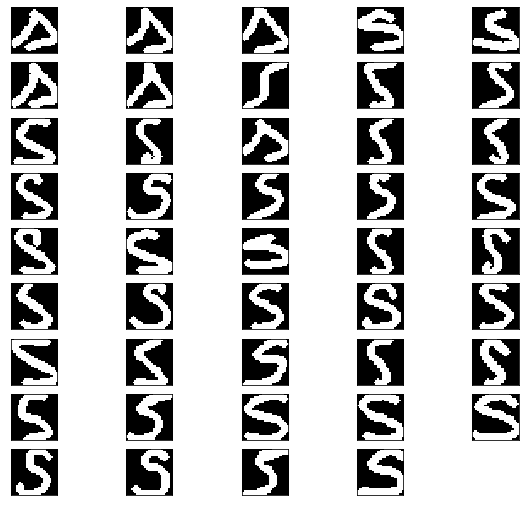

In [110]:
plt.figure(figsize=(10,10))
j = 0
for i in class_s.index:
    plt.subplot(10,5,j+1)
    j += 1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_s['features'][i].reshape((28,28)), cmap=plt.cm.binary)
    #plt.xlabel(class_s[i]['label']) # number of class

In [111]:
model.save('symbol_classifier.h5')

In [112]:
model_saved = keras.models.load_model('symbol_classifier.h5')

In [113]:
model_saved.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 101)               6565      
Total params: 60,965
Trainable params: 60,965
Non-trainable params: 0
_________________________________________________________________


In [114]:
loss, acc = model_saved.evaluate(x_train[:1000], y_train[:1000])

1000/1000 [==============================] - 0s 231us/sample - loss: 0.4890 - accuracy: 0.8410


In [116]:
loss, acc = model_saved.evaluate(x_test[2849:], y_test[2849:])

2706/2706 [==============================] - 0s 96us/sample - loss: 0.8107 - accuracy: 0.7809
